# Necessary Imports

In [769]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [770]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) using scikit-learn.

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    float: The calculated RMSE.
    """
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)


# Data Loading

In [845]:
path = "data"
train = pd.read_csv(f"{path}/train.csv")
test_ori = pd.read_csv(f"{path}/test.csv")
test = test_ori.copy()

In [772]:
train.shape

(5908, 13)

In [773]:
test.shape

(1477, 12)

In [774]:
train.head()

,ID,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,1,MAZDA,CX-5 Turbo 4WD,SUV - SMALL,2.5,4,AS6,X,10.8,8.7,9.8,29,230
1,2,BMW,M6 CABRIOLET,SUBCOMPACT,4.4,8,M6,Z,16.2,10.9,13.8,20,324
2,3,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.5,6,A6,E,17.9,NaN,15.7,18,261
3,4,CADILLAC,ATS-V,COMPACT,3.6,6,AS8,Z,13.9,9.4,11.9,24,279
4,5,LAND ROVER,Range Rover Sport TD6 Diesel,SUV - STANDARD,3.0,6,AS8,D,10.7,8.3,9.6,29,256


In [775]:
train.drop('ID',inplace=True,axis=1)

# Data Description

Dataset Description <br>
The dataset contains 7,385 rows and 12 columns, with key features including vehicle model, drive type, transmission type, fuel type, and fuel consumption ratings in both city and highway settings. The target variable, CO2 emissions, is measured in grams per kilometer for combined city and highway driving. Detailed descriptions and abbreviations for the dataset's features are provided to assist with your analysis.

Columns<br>
- Model
    - 4WD/4X4 = Four-wheel drive
    - AWD = All-wheel drive
    - FFV = Flexible-fuel vehicle
    - SWB = Short wheelbase
    - LWB = Long wheelbase
    - EWB = Extended wheelbase

- Transmission
    - A = Automatic
    - AM = Automated manual
    - AS = Automatic with select shift
    - AV = Continuously variable
    - M = Manual
    - 3 - 10 = Number of gears

- Fuel type
    - X = Regular gasoline
    - Z = Premium gasoline
    - D = Diesel
    - E = Ethanol (E85)
    - N = Natural gas

- Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

- CO2 Emissions
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

# Data Cleaning

## Separating Numeric and Categorical Columns

In [776]:
numeric = train.select_dtypes([np.number]).columns
categorical = train.select_dtypes("object").columns
print(numeric)
print(categorical)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


## Check NA or Null values

In [777]:
train.isnull().sum()

Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             0
Fuel Consumption City (L/100 km)    295
Fuel Consumption Hwy (L/100 km)     295
Fuel Consumption Comb (L/100 km)    295
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
dtype: int64

In [778]:
train[train.isnull().any(axis=1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2,FORD,F-150 FFV,PICKUP TRUCK - STANDARD,3.5,6,A6,E,17.9,NaN,15.7,18,261
23,ASTON MARTIN,DB11 AMR,MINICOMPACT,5.2,12,A8,Z,15.5,NaN,13.3,21,312
35,CHEVROLET,Camaro,SUBCOMPACT,3.6,6,AS10,X,12.5,NaN,10.5,27,247
39,DODGE,CHALLENGER (MDS),MID-SIZE,6.4,8,A8,Z,NaN,9.5,12.9,22,302
47,CHEVROLET,SILVERADO 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,A6,X,15.0,10.7,NaN,22,307
...,...,...,...,...,...,...,...,...,...,...,...,...
5884,AUDI,TTS ROADSTER QUATTRO,TWO-SEATER,2.0,4,A6,Z,NaN,8.8,10.3,27,237
5896,BMW,X7 xDrive40i,SUV - STANDARD,3.0,6,AS8,Z,12.0,NaN,10.8,26,254
5903,CHEVROLET,Suburban 4WD,SUV - STANDARD,5.3,8,A6,X,NaN,11.3,14.4,20,337
5904,HYUNDAI,ELANTRA,MID-SIZE,1.8,4,M6,X,NaN,6.4,7.7,37,180


## Check Duplicates

In [779]:
train.Model.nunique()

1938

In [780]:
train.Model.value_counts()

Model
F-150 FFV                            25
F-150 FFV 4X4                        25
MUSTANG                              21
SONIC                                18
SIERRA                               18
                                     ..
Encore AWD (SIDI with Stop/Start)     1
GRAND CHEROKEE 4X4 TRACKHAWK          1
911 Carrera T                         1
RANGE ROVER V8 5.0 SC                 1
AMG C 63 COUPE                        1
Name: count, Length: 1938, dtype: int64

## Combining Duplicate Rows with mean

In [781]:
train_grouped = train.groupby(['Model','Transmission']).agg({
    'Make' : pd.Series.mode,
    'Vehicle Class': pd.Series.mode,
    'Engine Size(L)': 'mean',
    'Cylinders': 'mean',
    'Fuel Type': pd.Series.mode,
    'Fuel Consumption City (L/100 km)': 'mean',
    'Fuel Consumption Hwy (L/100 km)': 'mean',
    'Fuel Consumption Comb (L/100 km)': 'mean',
    'Fuel Consumption Comb (mpg)': 'mean',
    'CO2 Emissions(g/km)': 'mean'
}).reset_index()
pd.DataFrame(train_grouped)

,Model,Transmission,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,124 SPIDER,A6,FIAT,TWO-SEATER,1.400,4.0,X,9.300000,6.500000,8.000,35.00,187.0
1,124 SPIDER,M6,FIAT,TWO-SEATER,1.400,4.0,X,9.000000,6.700000,7.900,36.00,185.0
2,124 Spider,M6,FIAT,TWO-SEATER,1.400,4.0,X,9.000000,6.700000,7.900,36.00,185.0
3,1500,A8,RAM,PICKUP TRUCK - STANDARD,5.175,7.5,X,15.266667,10.500000,13.175,21.75,308.0
4,1500 (MDS),A6,RAM,PICKUP TRUCK - STANDARD,5.700,8.0,X,17.100000,12.000000,14.800,19.00,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,tC,M6,SCION,COMPACT,2.500,4.0,X,10.200000,7.666667,9.000,31.00,208.0
2704,xB,AS4,SCION,STATION WAGON - SMALL,2.400,4.0,X,10.900000,8.550000,9.850,29.00,226.5
2705,xB,M5,SCION,STATION WAGON - SMALL,2.400,4.0,X,10.850000,8.550000,9.900,29.00,226.5
2706,xD,A4,SCION,SUBCOMPACT,1.800,4.0,X,8.800000,7.100000,8.000,35.00,184.0


In [782]:
train_grouped[["Model","Transmission"]].value_counts()

Model           Transmission
124 SPIDER      A6              1
OPTIMA TURBO    AS6             1
ODYSSEY         AS9             1
OPTIMA          A6              1
                AM7             1
                               ..
Civic Sedan     AV              1
                AV7             1
                M6              1
Civic Sedan Si  M6              1
xD              M5              1
Name: count, Length: 2708, dtype: int64

as we can see there are no more Model-Transmission Duplicates

## Combination check

In [783]:
train_grouped[train_grouped['Model']=='SONIC']

,Model,Transmission,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2227,SONIC,AS6,CHEVROLET,COMPACT,1.622222,4.0,X,9.266667,6.744444,8.150,34.666667,189.666667
2228,SONIC,M5,CHEVROLET,COMPACT,1.800000,4.0,X,9.075000,6.850000,8.075,35.000000,187.500000
2229,SONIC,M6,CHEVROLET,COMPACT,1.400000,4.0,X,8.475000,6.240000,7.460,38.000000,173.800000


In [784]:
train[train['Model']=='SONIC']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
19,CHEVROLET,SONIC,COMPACT,1.4,4,M6,X,8.5,6.2,7.5,38,173
110,CHEVROLET,SONIC,COMPACT,1.4,4,M6,X,8.5,6.2,7.5,38,173
1452,CHEVROLET,SONIC,COMPACT,1.8,4,AS6,X,9.6,6.7,8.3,34,191
1526,CHEVROLET,SONIC,COMPACT,1.4,4,AS6,X,9.0,6.8,NaN,35,188
1818,CHEVROLET,SONIC,COMPACT,1.8,4,AS6,X,9.6,6.7,8.3,34,195
1923,CHEVROLET,SONIC,COMPACT,1.4,4,AS6,X,8.8,6.6,7.8,36,184
2034,CHEVROLET,SONIC,COMPACT,1.4,4,AS6,X,8.8,6.6,7.8,36,184
2677,CHEVROLET,SONIC,COMPACT,1.8,4,AS6,X,9.7,6.9,8.4,34,197
2889,CHEVROLET,SONIC,COMPACT,1.4,4,AS6,X,9.0,6.8,8.0,35,184
3153,CHEVROLET,SONIC,COMPACT,1.8,4,M5,X,8.9,6.7,7.9,36,182


## Check Remaining NA

In [785]:
train_grouped.isnull().sum()

Model                                0
Transmission                         0
Make                                 0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Fuel Type                            0
Fuel Consumption City (L/100 km)    76
Fuel Consumption Hwy (L/100 km)     53
Fuel Consumption Comb (L/100 km)    74
Fuel Consumption Comb (mpg)          0
CO2 Emissions(g/km)                  0
dtype: int64

In [786]:
train_grouped[train_grouped.isnull().any(axis=1)]

,Model,Transmission,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6,1500 4X4,A6,RAM,PICKUP TRUCK - STANDARD,5.7,8.0,X,18.7,13.3,NaN,17.0,382.0
16,1500 Classic,A8,RAM,PICKUP TRUCK - STANDARD,5.7,8.0,X,NaN,11.0,13.6,21.0,319.0
42,228i COUPE,AS8,BMW,SUBCOMPACT,2.0,4.0,Z,NaN,6.5,8.4,34.0,193.0
51,230i Coupe,AS8,BMW,SUBCOMPACT,2.0,4.0,Z,NaN,7.4,8.5,33.0,200.0
73,328d xDRIVE TOURING,A8,BMW,STATION WAGON - SMALL,2.0,4.0,D,7.6,NaN,6.7,42.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,XT5,AS9,CADILLAC,SUV - SMALL,2.0,4.0,Z,NaN,8.3,9.8,29.0,227.0
2664,YUKON 4WD,A10,GMC,SUV - STANDARD,6.2,8.0,Z,NaN,10.7,13.8,20.0,325.0
2680,Yaris Hatchback,A4,TOYOTA,COMPACT,1.5,4.0,X,NaN,6.8,7.4,38.0,173.0
2682,Yukon 4WD,A10,GMC,SUV - STANDARD,6.2,8.0,Z,16.4,10.7,NaN,20.0,325.0


In [787]:
type(train_grouped)

pandas.core.frame.DataFrame

## Imputing NaN values with median by Vehicle Class

In [788]:
miss_col = ['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']

In [789]:
for col in miss_col:
    train_grouped[col] = train_grouped.groupby(train_grouped['Vehicle Class'].astype(str))[col].transform(lambda x: x.fillna(x.median()))

In [790]:
train_grouped.isnull().sum()

Model                               0
Transmission                        0
Make                                0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

 Now since the data is all clear, we can start the data Exploration

# Exploratory Data Analysis

## 1. Data Distribution

### Numerical Data Distribution

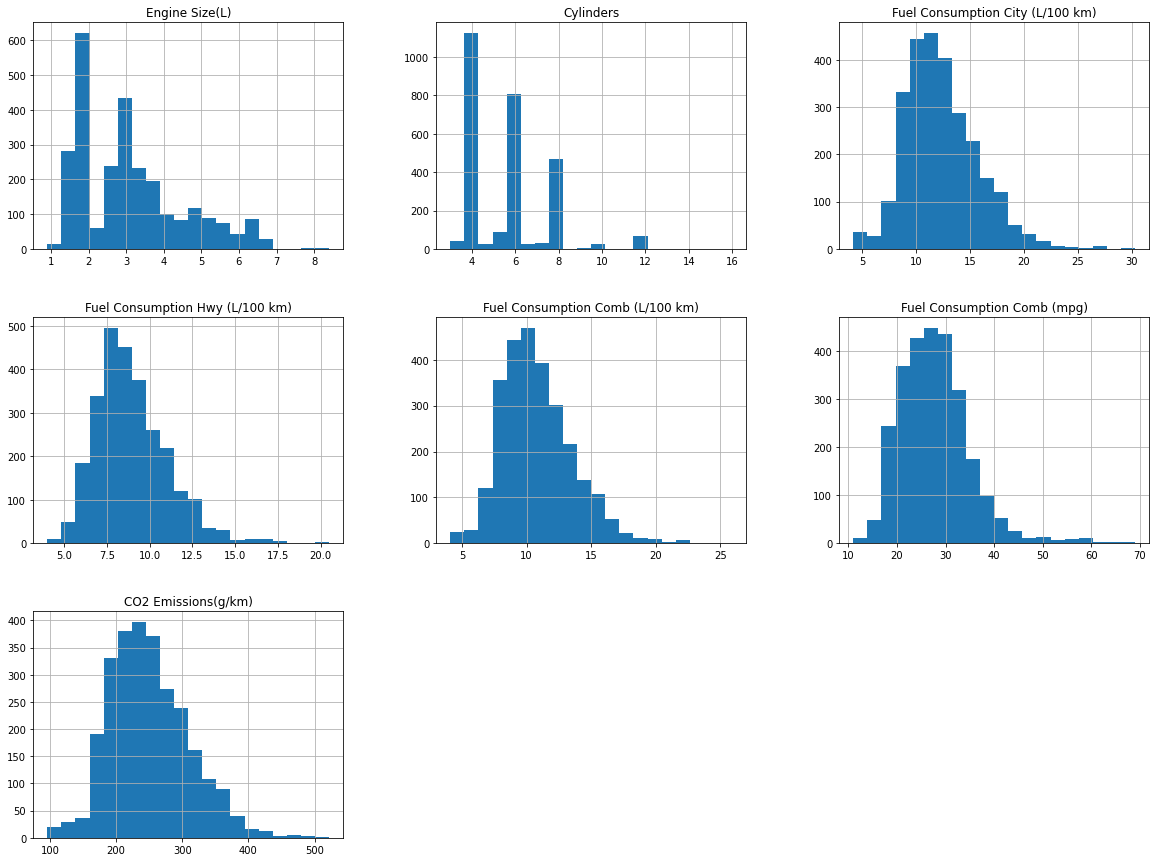

In [791]:
# Plot histograms for numerical variables
train_grouped[numeric].hist(bins=20, figsize=(20, 15))
plt.show()

### Numerical Box Plots

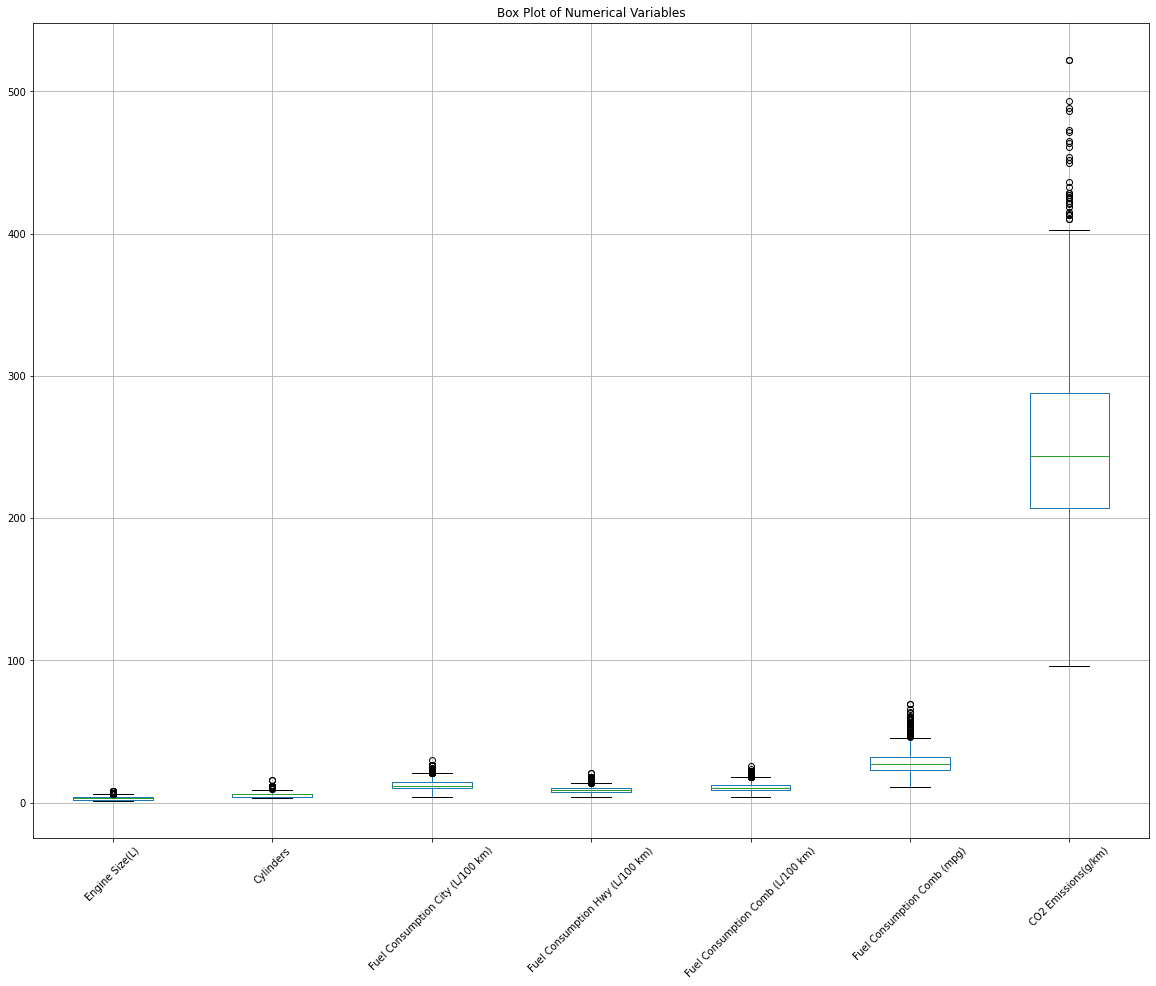

In [792]:
plt.figure(figsize=(20, 15))
train_grouped[numeric].boxplot(rot=45)
plt.title('Box Plot of Numerical Variables')
plt.show()

Since there are no really huge leaps, I will not consider any of them outliers

### Categorical Data Distribution

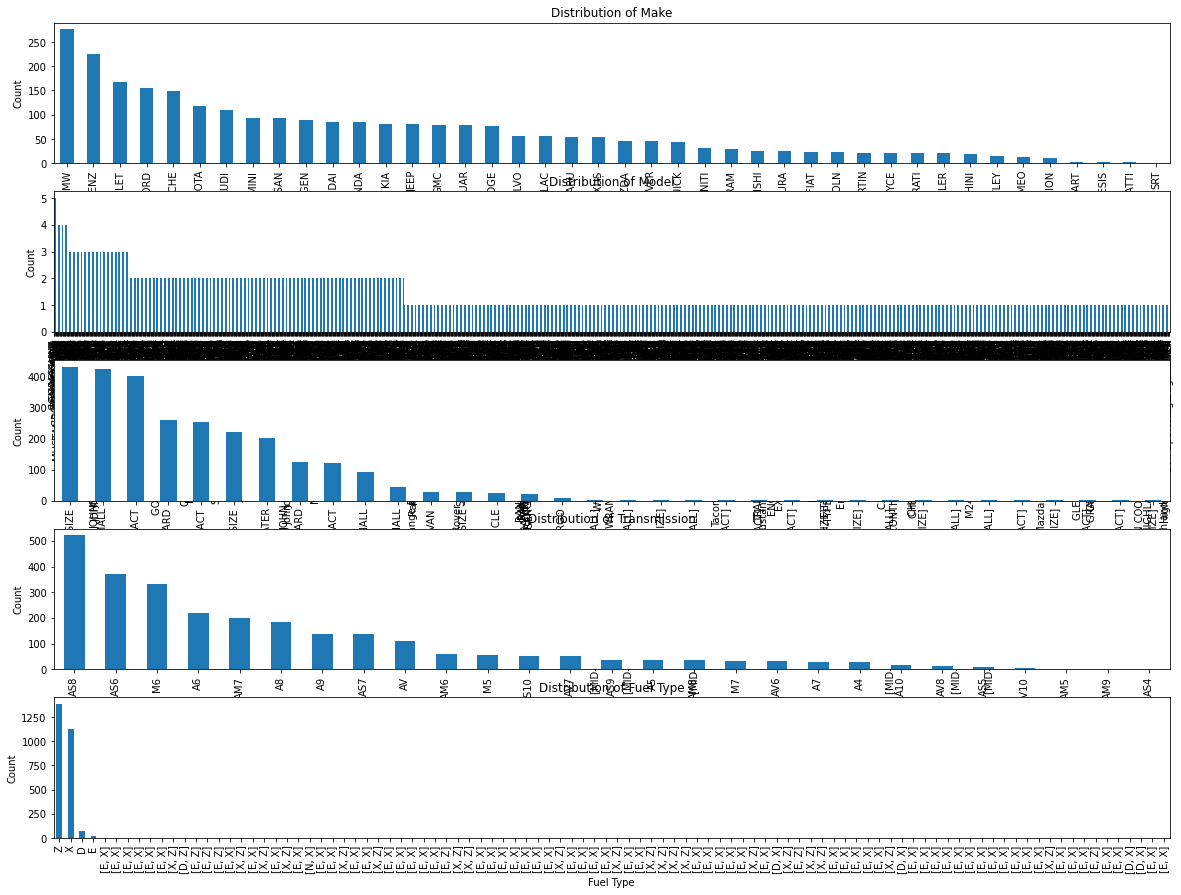

In [793]:
fig, axes = plt.subplots(5,figsize=(20, 15))

for i, cols in enumerate(categorical):
    train_grouped[cols].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {cols}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [794]:
train_grouped['Transmission'].value_counts()

Transmission
AS8     521
AS6     371
M6      332
A6      219
AM7     198
A8      184
A9      137
AS7     136
AV      110
AM6      59
M5       54
AS10     53
AV7      51
AS9      38
A5       35
AM8      35
M7       34
AV6      32
A7       30
A4       30
A10      16
AV8      14
AS5      11
AV10      4
AM5       2
AM9       1
AS4       1
Name: count, dtype: int64

In [795]:
train_grouped.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Transmission
A7      322.255556
A10     316.046875
A5      307.651190
A4      283.380000
A8      281.965401
AS7     280.499921
AS10    278.568269
AS5     277.924242
A6      269.851942
M7      268.524020
AM7     266.157660
AM9     261.000000
AM8     260.547619
AS8     259.469685
A9      253.399158
AS9     247.796491
AS6     237.147864
M6      234.748594
AS4     226.500000
AV8     218.113095
M5      195.381437
AV7     190.382026
AV10    188.458333
AV6     184.626042
AM6     183.573446
AV      173.540758
AM5     148.500000
Name: CO2 Emissions(g/km), dtype: float64

In [796]:
train_grouped['Fuel Type'].value_counts()

Fuel Type
Z         1384
X         1130
D           75
E           25
[E, X]       1
          ... 
[E, X]       1
[D, X]       1
[D, X]       1
[E, X]       1
[E, X]       1
Name: count, Length: 98, dtype: int64

since Fuel Type contains array values, classify them as others

In [797]:
train_grouped['Fuel Type'] = train_grouped['Fuel Type'].apply(lambda x: 'others' if isinstance(x, np.ndarray) else x)

In [798]:
train_grouped['Fuel Type'].value_counts()

Fuel Type
Z         1384
X         1130
others      94
D           75
E           25
Name: count, dtype: int64

In [799]:
train_grouped.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Fuel Type
others    283.934574
E         278.138844
Z         266.428646
X         228.819870
D         224.768889
Name: CO2 Emissions(g/km), dtype: float64

In [800]:
train_grouped['Make'].value_counts()

Make
BMW              276
MERCEDES-BENZ    225
CHEVROLET        168
FORD             156
PORSCHE          148
TOYOTA           117
AUDI             110
MINI              94
NISSAN            93
VOLKSWAGEN        90
HYUNDAI           85
HONDA             84
KIA               81
JEEP              80
GMC               79
JAGUAR            78
DODGE             76
VOLVO             57
CADILLAC          56
SUBARU            55
LEXUS             54
MAZDA             46
LAND ROVER        45
BUICK             43
INFINITI          31
RAM               29
MITSUBISHI        25
ACURA             25
FIAT              24
LINCOLN           23
ASTON MARTIN      22
ROLLS-ROYCE       22
MASERATI          22
CHRYSLER          22
LAMBORGHINI       20
BENTLEY           14
ALFA ROMEO        13
SCION             11
SMART              3
GENESIS            3
BUGATTI            2
SRT                1
Name: count, dtype: int64

In [801]:
train_grouped.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Make
BUGATTI          522.000000
LAMBORGHINI      401.145833
SRT              389.000000
ROLLS-ROYCE      387.393939
BENTLEY          370.869048
ASTON MARTIN     343.185606
MASERATI         315.779545
GMC              301.541521
RAM              291.179803
LAND ROVER       286.629630
DODGE            284.801008
GENESIS          281.666667
MERCEDES-BENZ    281.167037
CADILLAC         272.017241
LINCOLN          270.963699
JAGUAR           270.495513
CHEVROLET        264.778938
FORD             260.257181
JEEP             260.073482
PORSCHE          259.957432
BMW              250.700785
INFINITI         250.638364
CHRYSLER         250.240932
AUDI             247.615368
NISSAN           237.441308
LEXUS            235.132099
VOLVO            232.887427
BUICK            225.044574
ACURA            223.380000
ALFA ROMEO       222.794872
TOYOTA           216.646866
SUBARU           215.027879
VOLKSWAGEN       209.007910
KIA              208.649295
HYUNDAI          206.558235
MITSUBISHI     

In [802]:
train_grouped['Vehicle Class'].value_counts()

Vehicle Class
MID-SIZE                             432
SUV - SMALL                          424
COMPACT                              401
SUV - STANDARD                       260
SUBCOMPACT                           255
FULL-SIZE                            221
TWO-SEATER                           203
PICKUP TRUCK - STANDARD              124
MINICOMPACT                          122
STATION WAGON - SMALL                 94
PICKUP TRUCK - SMALL                  45
MINIVAN                               28
STATION WAGON - MID-SIZE              27
SPECIAL PURPOSE VEHICLE               26
VAN - PASSENGER                       20
VAN - CARGO                            8
[MID-SIZE, STATION WAGON - SMALL]      1
[MID-SIZE, STATION WAGON - SMALL]      1
[FULL-SIZE, MID-SIZE]                  1
[MID-SIZE, STATION WAGON - SMALL]      1
[COMPACT, SUBCOMPACT]                  1
[COMPACT, SUBCOMPACT]                  1
[COMPACT, SUBCOMPACT]                  1
[COMPACT, MID-SIZE]                    1
[C

Since some values are still in array form, I will classify them with their first entry

In [803]:
train_grouped['Vehicle Class'] = train_grouped['Vehicle Class'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

In [804]:
train_grouped['Vehicle Class'].value_counts()

Vehicle Class
MID-SIZE                    438
SUV - SMALL                 424
COMPACT                     411
SUV - STANDARD              260
SUBCOMPACT                  255
FULL-SIZE                   223
TWO-SEATER                  203
PICKUP TRUCK - STANDARD     124
MINICOMPACT                 122
STATION WAGON - SMALL        94
PICKUP TRUCK - SMALL         45
MINIVAN                      28
STATION WAGON - MID-SIZE     27
SPECIAL PURPOSE VEHICLE      26
VAN - PASSENGER              20
VAN - CARGO                   8
Name: count, dtype: int64

In [805]:
train_grouped.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Vehicle Class
VAN - PASSENGER             392.480357
VAN - CARGO                 363.156250
SUV - STANDARD              308.641023
PICKUP TRUCK - STANDARD     304.010440
TWO-SEATER                  284.783662
PICKUP TRUCK - SMALL        284.116058
FULL-SIZE                   264.166209
MINIVAN                     261.875992
STATION WAGON - MID-SIZE    251.476543
SUBCOMPACT                  242.902414
MINICOMPACT                 241.323770
SUV - SMALL                 237.259887
SPECIAL PURPOSE VEHICLE     237.047436
MID-SIZE                    223.546099
COMPACT                     220.277485
STATION WAGON - SMALL       200.934321
Name: CO2 Emissions(g/km), dtype: float64

### Pairplot of Numeric Columns

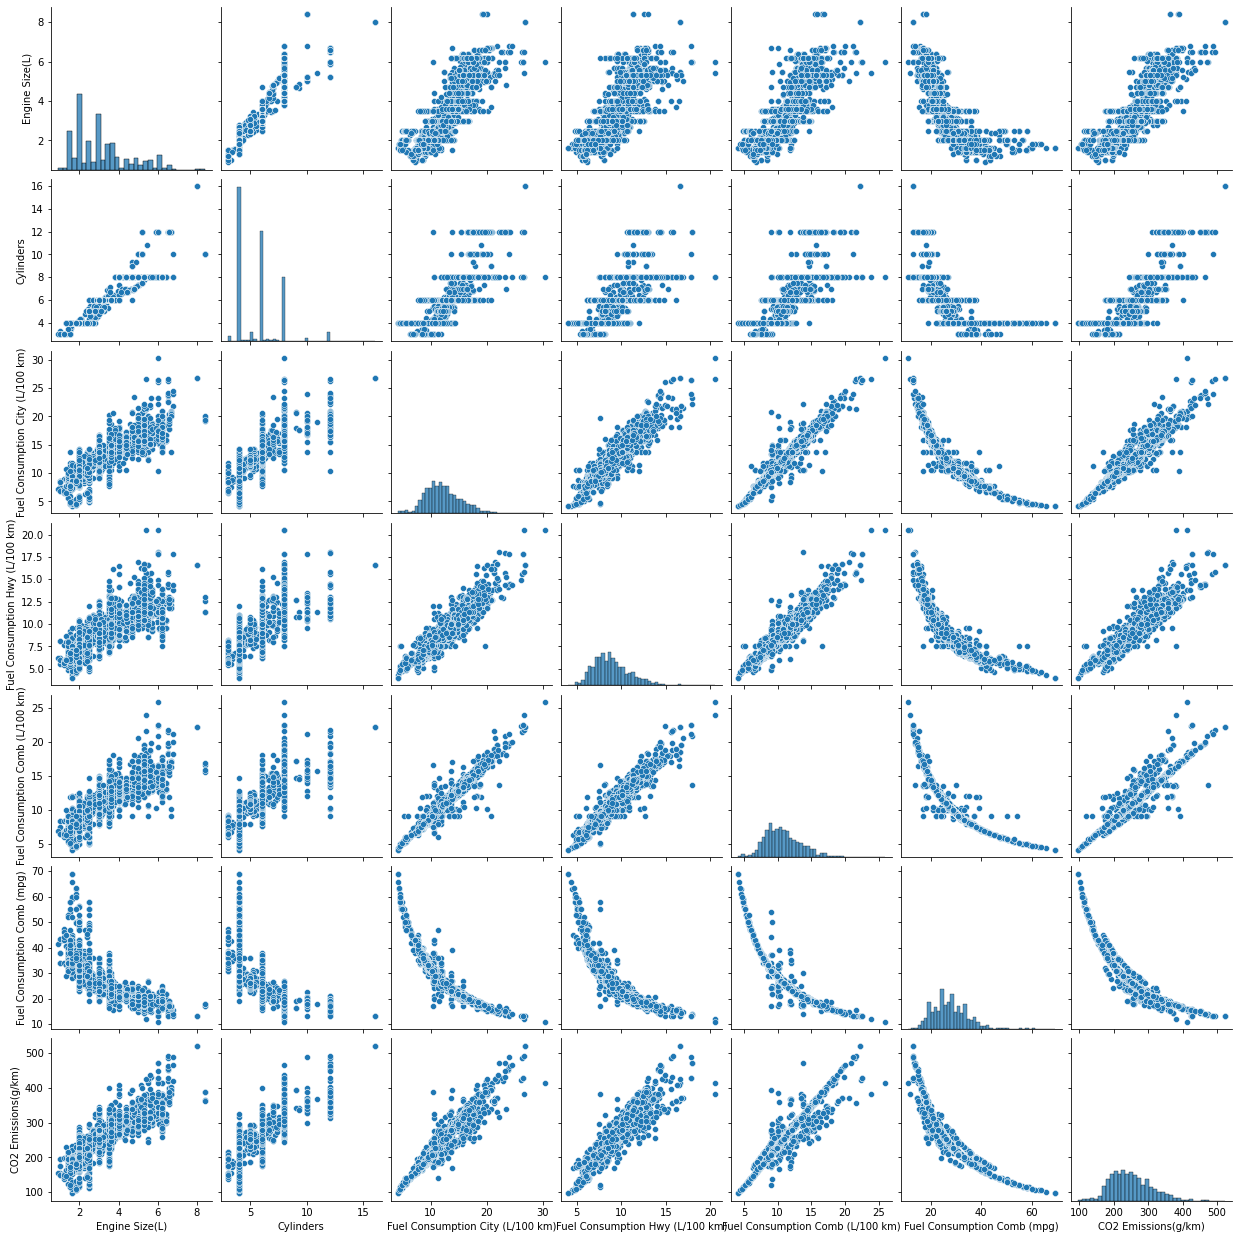

In [806]:
sns.pairplot(data=train_grouped[numeric])

since by definition and looking at the plot we know that Fuel Consumption Comp (mpg) is the inverse of Fuel Consumption Comp (L/100km), we will drop it

In [807]:
# train_grouped.drop('Fuel Consumption Comb (mpg)',axis=1,inplace=True)


In [808]:
numeric = numeric.drop("Fuel Consumption Comb (mpg)")

## 2. Data Corellation

<Axes: >

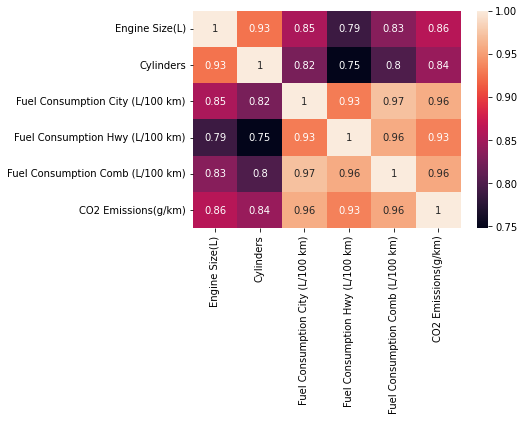

In [809]:
sns.heatmap(train_grouped[numeric].corr(),annot=True)

# Data Preparation

In [810]:
state = 7

## Categorical Feature Handling

Because of the sheer number of unique categorical values, I decided to use a TargetEncoder to handle them with low dimensionality

In [811]:
print(categorical)

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


In [812]:
from sklearn.preprocessing import TargetEncoder

X = train_grouped.drop('CO2 Emissions(g/km)',axis=1)
y = train_grouped['CO2 Emissions(g/km)']

X.columns = X.columns.astype(str)
te = TargetEncoder(smooth="auto",target_type='continuous')
te.fit(X,y)

X = pd.DataFrame(te.transform(X),columns=X.columns)

In [813]:
X.head()

,Model,Transmission,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,186.008929,269.763001,191.902689,284.517484,185.515055,201.716092,228.836373,192.392855,190.103949,186.818940,188.380125
1,186.008929,234.786494,191.902689,284.517484,185.515055,201.716092,228.836373,192.588503,189.529823,187.625859,184.758874
2,185.000000,234.786494,191.902689,284.517484,185.515055,201.716092,228.836373,192.588503,189.529823,187.625859,184.758874
3,308.000000,281.854915,290.667919,303.898733,307.060504,307.060504,228.836373,313.235570,302.785043,308.000000,308.000000
4,328.305493,269.763001,290.667919,303.898733,331.889063,321.327974,228.836373,342.673077,324.251989,333.829871,337.011798


# Feature Engineering

## Cylinder per Engine Size

In [814]:
yz = y.to_frame('CO2 Emissions(g/km)')
newpd = pd.concat([X.reset_index(drop=True),yz.reset_index(drop=True)],axis=1)


In [815]:
newpd.head()

,Model,Transmission,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,186.008929,269.763001,191.902689,284.517484,185.515055,201.716092,228.836373,192.392855,190.103949,186.818940,188.380125,187.0
1,186.008929,234.786494,191.902689,284.517484,185.515055,201.716092,228.836373,192.588503,189.529823,187.625859,184.758874,185.0
2,185.000000,234.786494,191.902689,284.517484,185.515055,201.716092,228.836373,192.588503,189.529823,187.625859,184.758874,185.0
3,308.000000,281.854915,290.667919,303.898733,307.060504,307.060504,228.836373,313.235570,302.785043,308.000000,308.000000,308.0
4,328.305493,269.763001,290.667919,303.898733,331.889063,321.327974,228.836373,342.673077,324.251989,333.829871,337.011798,340.0


<Axes: >

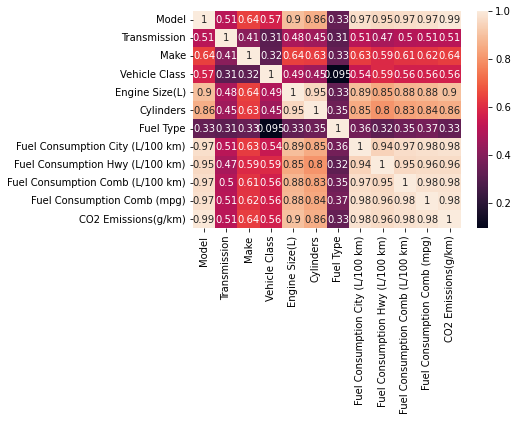

In [816]:
sns.heatmap(newpd[newpd.select_dtypes(np.number).columns].corr(),annot=True)

## Data Splitting

### Train Test Split

In [817]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)


### KFold CV

In [818]:
kf = KFold(n_splits=5, shuffle=False)

# Model Selection

## Base XGBoost Model

In [819]:
from xgboost import XGBRegressor
model1 = XGBRegressor(enable_categorical=True)
model1.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

RMSE Scoring

In [820]:
y_pred = model1.predict(X_test)
rmse(y_test,y_pred)

5.651866699348396

CV Scoring

In [821]:
from statistics import stdev
score = cross_val_score(model1, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
model1_cv_score = score.mean()
model1_cv_stdev = stdev(score)
print('Cross Validation RMSE scores are: {}'.format(score))
print('Average Cross Validation RMSE score: ', model1_cv_score)
print('Cross Validation RMSE standard deviation: ', model1_cv_stdev)

Cross Validation RMSE scores are: [-4.3438539  -3.73325181 -5.35337756 -4.8589838  -4.74283714]
Average Cross Validation RMSE score:  -4.6064608403213345
Cross Validation RMSE standard deviation:  0.6065697277226294


this will be the benchmark before our tuning

## GridSearchCV

I will use GridSearchCV in conjunction with KFoldCV to tune the model

### GridSearch 1 : n_estimators

In [822]:
from sklearn.model_selection import GridSearchCV

params_grid ={
    'max_depth': [5],
    'learning_rate': [0.1],
    'n_estimators': [50,100,200,250,300,500,1000],
}

gsearch1 = GridSearchCV(model1, param_grid=params_grid, cv=kf, scoring='neg_root_mean_squared_error')
gs1_res = gsearch1.fit(X_train,y_train)

print(gsearch1.best_params_)
print(gsearch1.best_score_)

params = gs1_res.cv_results_['params']
means = gs1_res.cv_results_['mean_test_score']
stds = gs1_res.cv_results_['std_test_score']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
-4.200295816131328
-4.767509 (0.510607) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
-4.474032 (0.502081) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
-4.324362 (0.476640) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
-4.285323 (0.476380) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
-4.262857 (0.479143) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
-4.225756 (0.479074) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
-4.200296 (0.477337) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}


### GridSearch 2 : max_depth & min_child_weight

In [823]:
params_grid2 = {
    'max_depth' : range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch2 = GridSearchCV(gsearch1.best_estimator_, param_grid=params_grid2, cv=kf, scoring='neg_root_mean_squared_error')
gs2_res = gsearch2.fit(X_train,y_train)

print(gsearch2.best_params_)
print(gsearch2.best_score_)

params = gs2_res.cv_results_['params']
means = gs2_res.cv_results_['mean_test_score']
stds = gs2_res.cv_results_['std_test_score']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

{'max_depth': 3, 'min_child_weight': 1}
-4.180840069523539
-4.180840 (0.450613) with: {'max_depth': 3, 'min_child_weight': 1}
-4.542222 (0.710873) with: {'max_depth': 3, 'min_child_weight': 3}
-4.514476 (0.792013) with: {'max_depth': 3, 'min_child_weight': 5}
-4.200296 (0.477337) with: {'max_depth': 5, 'min_child_weight': 1}
-4.430240 (0.798780) with: {'max_depth': 5, 'min_child_weight': 3}
-4.508340 (0.842709) with: {'max_depth': 5, 'min_child_weight': 5}
-4.435516 (0.587022) with: {'max_depth': 7, 'min_child_weight': 1}
-4.595559 (0.906558) with: {'max_depth': 7, 'min_child_weight': 3}
-4.653794 (0.919678) with: {'max_depth': 7, 'min_child_weight': 5}
-4.437534 (0.592234) with: {'max_depth': 9, 'min_child_weight': 1}
-4.667174 (0.910291) with: {'max_depth': 9, 'min_child_weight': 3}
-4.633189 (0.871440) with: {'max_depth': 9, 'min_child_weight': 5}


### GridSearch 3 : Gamma

In [824]:
params_grid3 ={
    'gamma' : [i/10.0 for i in range(0,5)],
}

gsearch3 = GridSearchCV(gsearch2.best_estimator_, param_grid=params_grid3, cv=kf, scoring='neg_root_mean_squared_error')
gs3_res = gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_)
print(gsearch3.best_score_)

params = gs3_res.cv_results_['params']
means = gs3_res.cv_results_['mean_test_score']
stds = gs3_res.cv_results_['std_test_score']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

{'gamma': 0.3}
-4.157550427475165
-4.180840 (0.450613) with: {'gamma': 0.0}
-4.163666 (0.479470) with: {'gamma': 0.1}
-4.184778 (0.466544) with: {'gamma': 0.2}
-4.157550 (0.466720) with: {'gamma': 0.3}
-4.160856 (0.445664) with: {'gamma': 0.4}


### GridSearch 4 : subsample & colsample_bytree

In [825]:
params_grid4 = {
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)]
}

gsearch4 = GridSearchCV(gsearch3.best_estimator_, param_grid=params_grid4, cv=kf, scoring='neg_root_mean_squared_error')
gs4_res = gsearch4.fit(X_train,y_train)

print(gsearch4.best_params_)
print(gsearch4.best_score_)

params = gs4_res.cv_results_['params']
means = gs4_res.cv_results_['mean_test_score']
stds = gs4_res.cv_results_['std_test_score']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

{'colsample_bytree': 1.0, 'subsample': 0.9}
-4.109345668629821
-4.234308 (0.377932) with: {'colsample_bytree': 0.6, 'subsample': 0.6}
-4.215653 (0.422604) with: {'colsample_bytree': 0.6, 'subsample': 0.7}
-4.149049 (0.401445) with: {'colsample_bytree': 0.6, 'subsample': 0.8}
-4.143729 (0.414184) with: {'colsample_bytree': 0.6, 'subsample': 0.9}
-4.145860 (0.392187) with: {'colsample_bytree': 0.6, 'subsample': 1.0}
-4.161730 (0.439789) with: {'colsample_bytree': 0.7, 'subsample': 0.6}
-4.199861 (0.460604) with: {'colsample_bytree': 0.7, 'subsample': 0.7}
-4.236441 (0.563619) with: {'colsample_bytree': 0.7, 'subsample': 0.8}
-4.155864 (0.465751) with: {'colsample_bytree': 0.7, 'subsample': 0.9}
-4.223228 (0.452409) with: {'colsample_bytree': 0.7, 'subsample': 1.0}
-4.165900 (0.480807) with: {'colsample_bytree': 0.8, 'subsample': 0.6}
-4.182423 (0.476635) with: {'colsample_bytree': 0.8, 'subsample': 0.7}
-4.197240 (0.471586) with: {'colsample_bytree': 0.8, 'subsample': 0.8}
-4.182081 (0.4

### GridSearch 5 : Regularization Parameter

In [826]:
params_grid5 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 0, 1, 100]
}

gsearch5 = GridSearchCV(gsearch4.best_estimator_, param_grid=params_grid5, cv=kf, scoring='neg_root_mean_squared_error')
gs5_res = gsearch5.fit(X_train,y_train)

print(gsearch5.best_params_)
print(gsearch5.best_score_)

params = gs5_res.cv_results_['params']
means = gs5_res.cv_results_['mean_test_score']
stds = gs5_res.cv_results_['std_test_score']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

{'reg_alpha': 1e-05}
-4.108518912652088
-4.108519 (0.477105) with: {'reg_alpha': 1e-05}
-4.149380 (0.482471) with: {'reg_alpha': 0.01}
-4.150453 (0.472806) with: {'reg_alpha': 0.1}
-4.109346 (0.477347) with: {'reg_alpha': 0}
-4.143552 (0.469561) with: {'reg_alpha': 1}
-5.353753 (0.533127) with: {'reg_alpha': 100}


### GridSearch 6 : Final Learning Rate & n_estimators

In [827]:
params_grid6 = {
    'n_estimators' : [100,300,500,700,1000],
    'learning_rate': [i/100.0 for i in range(1,20,1)],
}

gsearch6 = GridSearchCV(gsearch5.best_estimator_, param_grid=params_grid6, cv=kf, scoring='neg_root_mean_squared_error')
gs6_res = gsearch6.fit(X_train,y_train)

print(gsearch6.best_params_)
print(gsearch6.best_score_)

params = gs6_res.cv_results_['params']
means = gs6_res.cv_results_['mean_test_score']
stds = gs6_res.cv_results_['std_test_score']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

{'learning_rate': 0.13, 'n_estimators': 1000}
-4.103205857152432
-24.164337 (1.619248) with: {'learning_rate': 0.01, 'n_estimators': 100}
-7.238676 (0.756585) with: {'learning_rate': 0.01, 'n_estimators': 300}
-5.508247 (0.512615) with: {'learning_rate': 0.01, 'n_estimators': 500}
-5.181636 (0.488722) with: {'learning_rate': 0.01, 'n_estimators': 700}
-4.969039 (0.488572) with: {'learning_rate': 0.01, 'n_estimators': 1000}
-11.297292 (1.143557) with: {'learning_rate': 0.02, 'n_estimators': 100}
-5.336380 (0.542885) with: {'learning_rate': 0.02, 'n_estimators': 300}
-5.002696 (0.542611) with: {'learning_rate': 0.02, 'n_estimators': 500}
-4.819973 (0.537700) with: {'learning_rate': 0.02, 'n_estimators': 700}
-4.619811 (0.533028) with: {'learning_rate': 0.02, 'n_estimators': 1000}
-7.221318 (0.732469) with: {'learning_rate': 0.03, 'n_estimators': 100}
-5.050486 (0.475797) with: {'learning_rate': 0.03, 'n_estimators': 300}
-4.762444 (0.481570) with: {'learning_rate': 0.03, 'n_estimators': 

with the hyperparameters tuned, let's go back to compare to the base model

## Final Comparison

In [828]:
model_final = gsearch6.best_estimator_
model_final.fit(X_train, y_train)
y_pred_final = model_final.predict(X_test)

rmse score

In [829]:
print(f"Base score : {rmse(y_test,y_pred)}")
print(f"Improved score : {rmse(y_test,y_pred_final)}")

Base score : 5.651866699348396
Improved score : 4.578501906320155


In [830]:
score_final = cross_val_score(model_final, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
model_final_cv_score = score_final.mean()
model_final_cv_stdev = np.std(score_final)
print('Cross Validation RMSE scores are: {}'.format(score_final))
print('Average Cross Validation RMSE score: ', model_final_cv_score)
print('Cross Validation RMSE standard deviation: ', model_final_cv_stdev)

Cross Validation RMSE scores are: [-4.0942898  -3.53686037 -4.81365077 -3.9293728  -4.14185556]
Average Cross Validation RMSE score:  -4.103205857152432
Cross Validation RMSE standard deviation:  0.4140701408981991


In [831]:
print(f"Base score : {model1_cv_score}, {model1_cv_stdev}")
print(f"Improved score : {model_final_cv_score}, {model_final_cv_stdev}")

Base score : -4.6064608403213345, 0.6065697277226294
Improved score : -4.103205857152432, 0.4140701408981991


In [832]:
model_final.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Final Predictions

## Test Data Preprocessing

In [846]:
test.head()

,ID,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,1,CHEVROLET,MALIBU,MID-SIZE,1.5,4,A6,X,8.7,6.3,7.6,37
1,2,LINCOLN,MKZ HYBRID,MID-SIZE,2.0,4,AV,X,5.7,6.2,5.9,48
2,3,TOYOTA,GR Supra,TWO-SEATER,3.0,6,AS8,Z,9.9,7.7,8.9,32
3,4,FORD,F-150 RAPTOR 4X4,PICKUP TRUCK - STANDARD,6.2,8,AS6,X,20.4,15.0,18.0,16
4,5,CADILLAC,ATS AWD,COMPACT,3.6,6,AS8,X,12.1,8.6,10.5,27


In [847]:
test.drop('ID',axis=1,inplace=True)

In [848]:
test['Fuel Type'] = test['Fuel Type'].apply(lambda x: 'others' if isinstance(x, np.ndarray) else x)

In [849]:
test['Vehicle Class'] = test['Vehicle Class'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

In [837]:
# test.drop('Fuel Consumption Comb (mpg)',axis=1,inplace=True)

In [850]:
test.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')

In [851]:
X.columns

Index(['Model', 'Transmission', 'Make', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')

In [852]:
test = test[['Model', 'Transmission', 'Make', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']]

In [853]:
test.columns = test.columns.astype(str)
te.transform(test)
test = pd.DataFrame(te.transform(test),columns=test.columns)

## Test Predicting

In [854]:
submissions = model_final.predict(test)


In [855]:
csv_sub = pd.DataFrame({'ID':test_ori['ID'],'CO2 Emissions(g/km)':submissions})
csv_sub.to_csv('submission6.csv',index=False)

# Model Saving

In [163]:
import pickle
pickle.dump(model_final, open('model.pkl', 'wb'))